In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("concrete_data.csv")
print(df.shape)
df.sample(2)

(1030, 9)


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
146,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30
390,450.1,50.0,0.0,200.0,3.0,1124.4,613.2,28,39.38


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [5]:
df.describe()  # Some Column have 0 which is an issue when it comes to Box-Cox

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
df.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [9]:
X= df.drop(columns=['Strength'])
y = df['Strength']

x_train, x_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2,
                                                   random_state=42)
print(x_train.shape,x_test.shape)

(824, 8) (206, 8)


In [10]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

print("R2 score :",r2_score(y_test,y_pred))

R2 score : 0.6275531792314852


In [11]:
# let's do cross validation
np.mean(cross_val_score(lr,X,y,scoring='r2'))

0.4609940491662865

C:\Users\ashis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


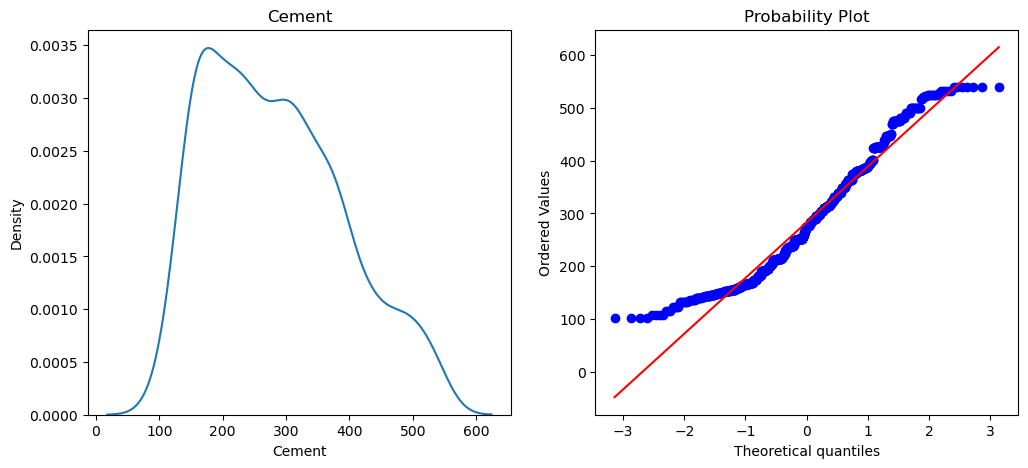

C:\Users\ashis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


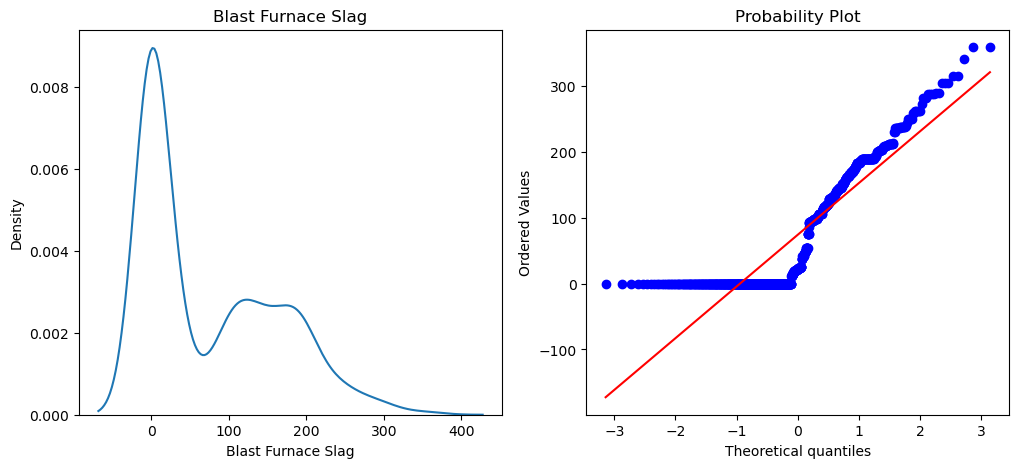

C:\Users\ashis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


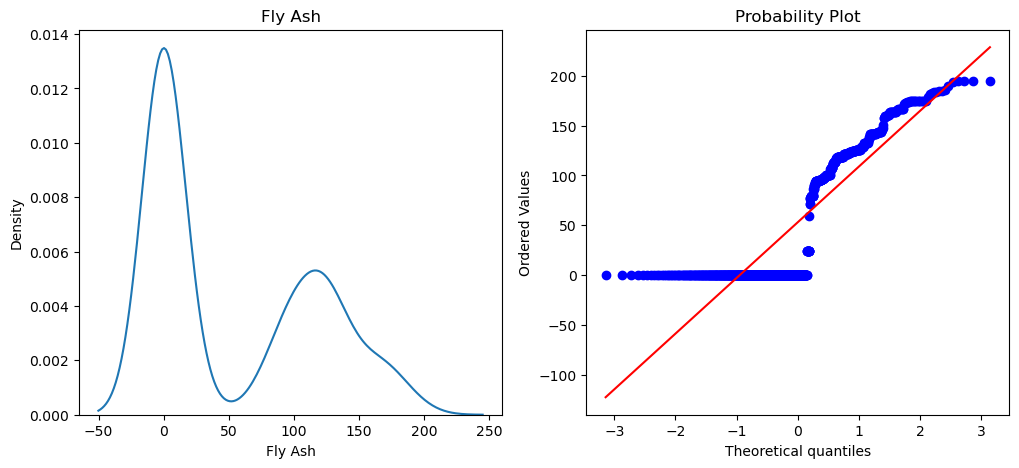

C:\Users\ashis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


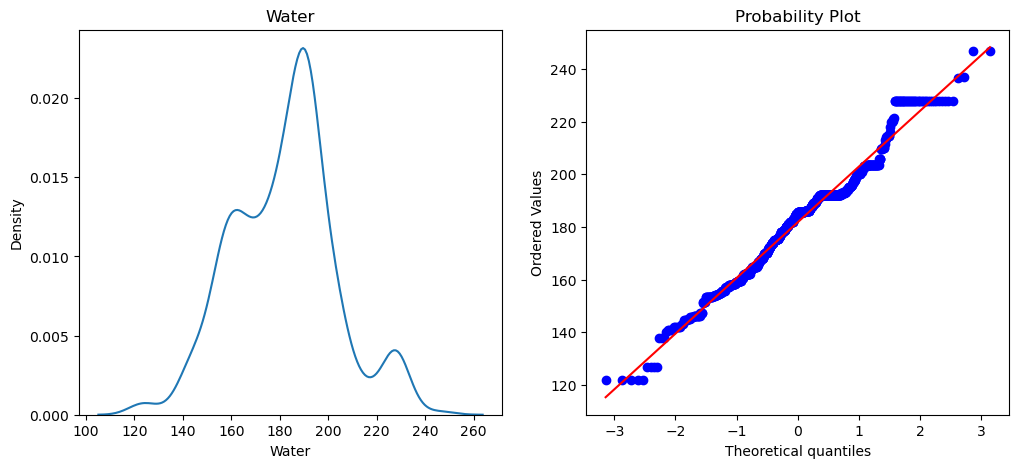

C:\Users\ashis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


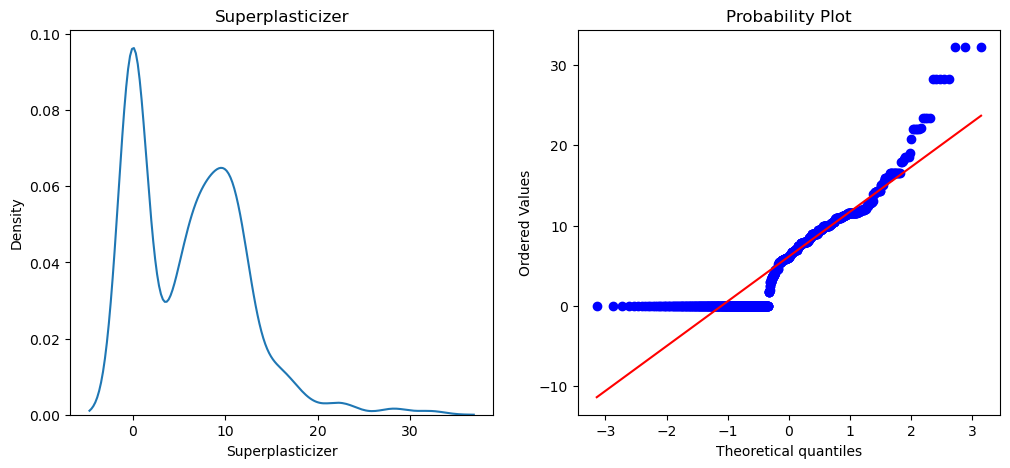

C:\Users\ashis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


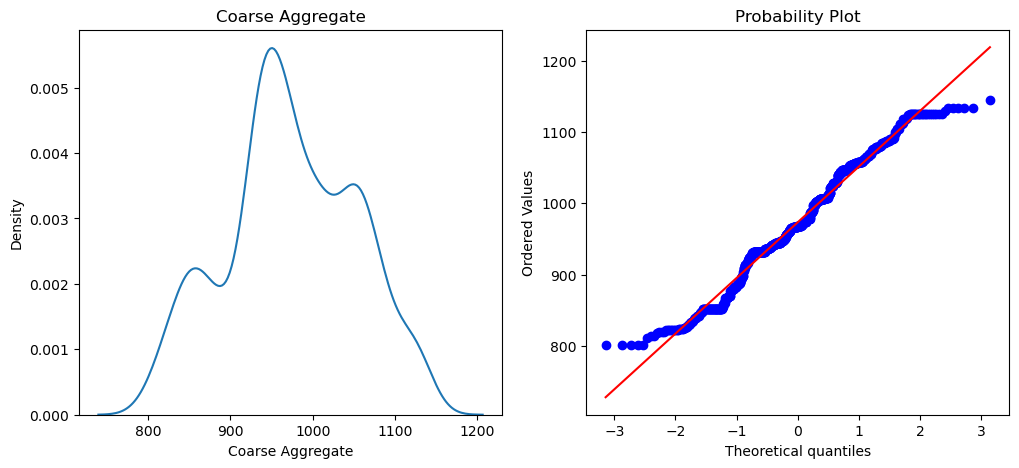

C:\Users\ashis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


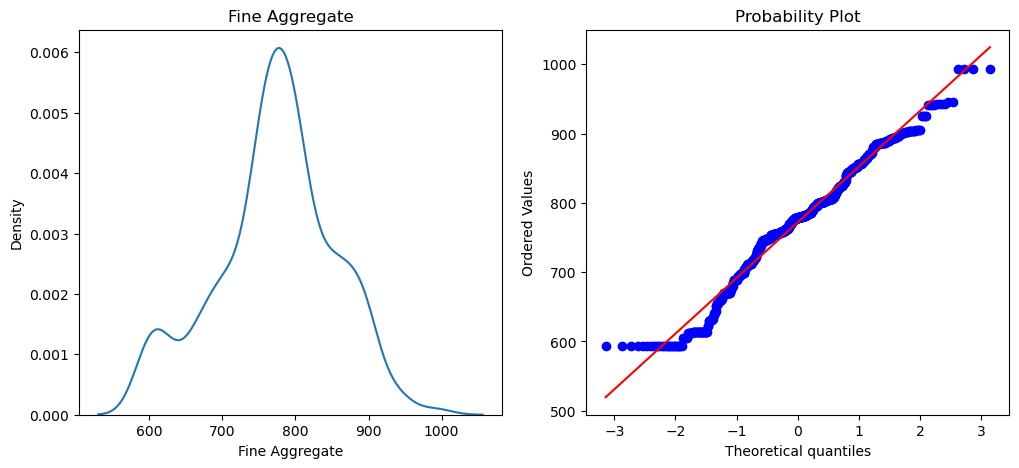

C:\Users\ashis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


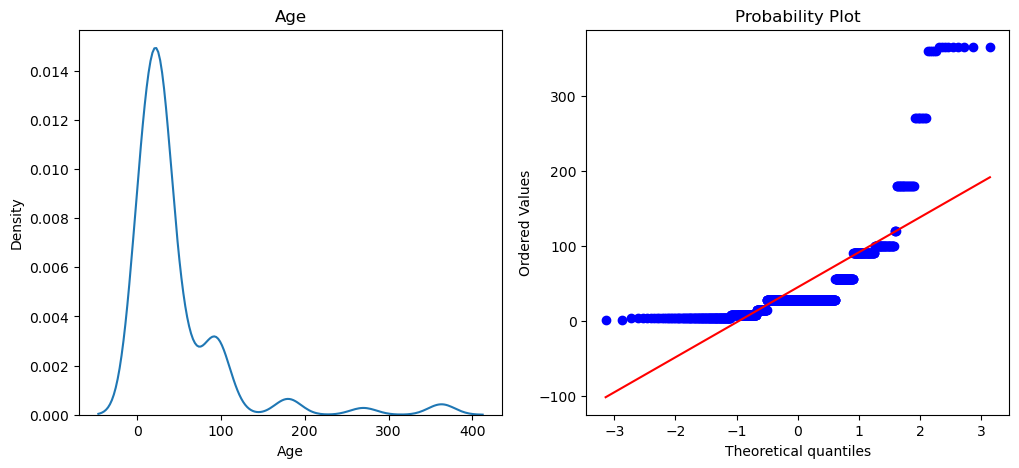

In [15]:
for col in x_train.columns:
    fig,axes = plt.subplots(1,2,figsize =(12,5))
    
    axes[0].set_title(col)
    sns.kdeplot(x_train[col],ax=axes[0])
    
    stats.probplot(x_train[col],dist='norm',plot=plt)
    
    plt.show()

In [18]:
# Applying Box-Cox
pt = PowerTransformer(method='box-cox')

x_train_transformed = pt.fit_transform(x_train + 0.000001)  # Since box-cox can't work with 0 data so we have added a very small value 0.000001  
x_test_transformed = pt.transform(x_test + 0.000001)

pd.DataFrame({'col':x_train.columns,'box_cox_lambdas':pt.lambdas_})

,col,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782019
7,Age,0.066631


In [20]:
# Applying linear transformation on transformed data
lr.fit(x_train_transformed,y_train)
y_pred2 = lr.predict(x_test_transformed)

print("R2 Score :",r2_score(y_test,y_pred2))

R2 Score : 0.8047825006181186


In [21]:
# cross validation
X_transformed = pt.fit_transform(X+0.000001)
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

0.666295032786924

In [25]:
x_train_transformed = pd.DataFrame(x_train_transformed,columns=x_train.columns)
x_test_transformed = pd.DataFrame(x_test_transformed,columns=x_test.columns)

Cement


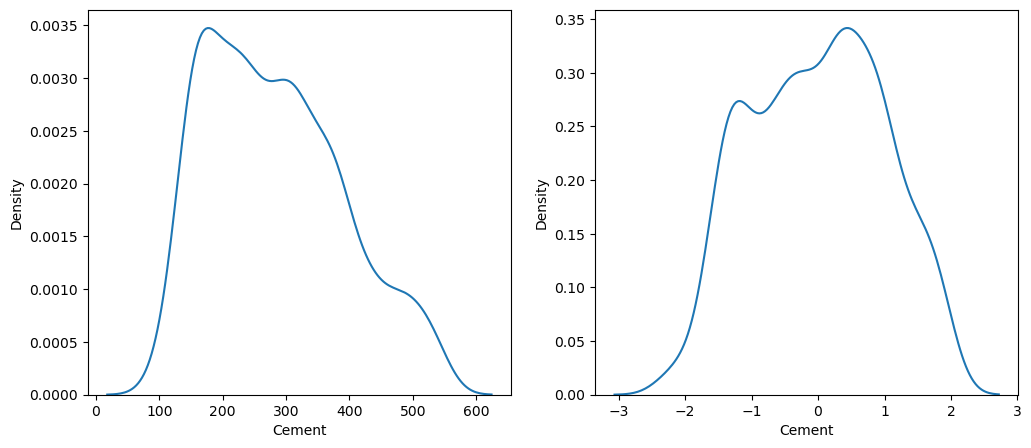

Blast Furnace Slag


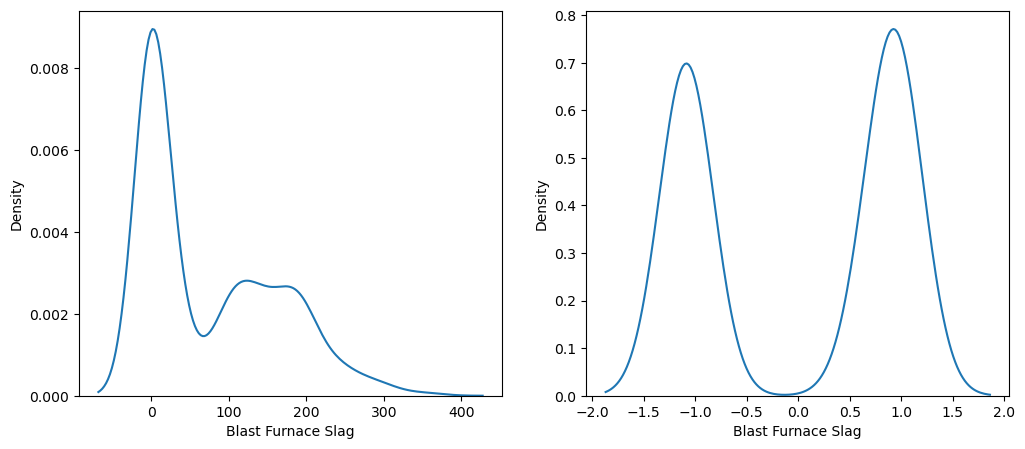

Fly Ash


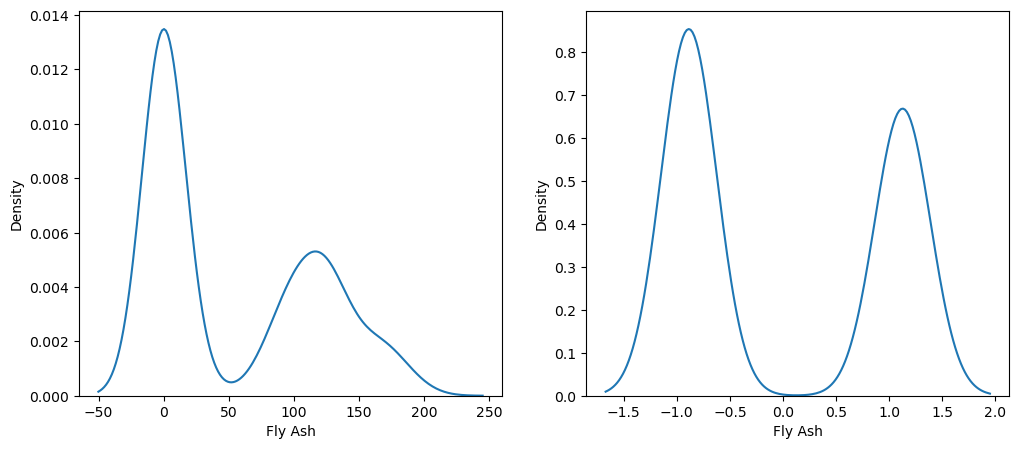

Water


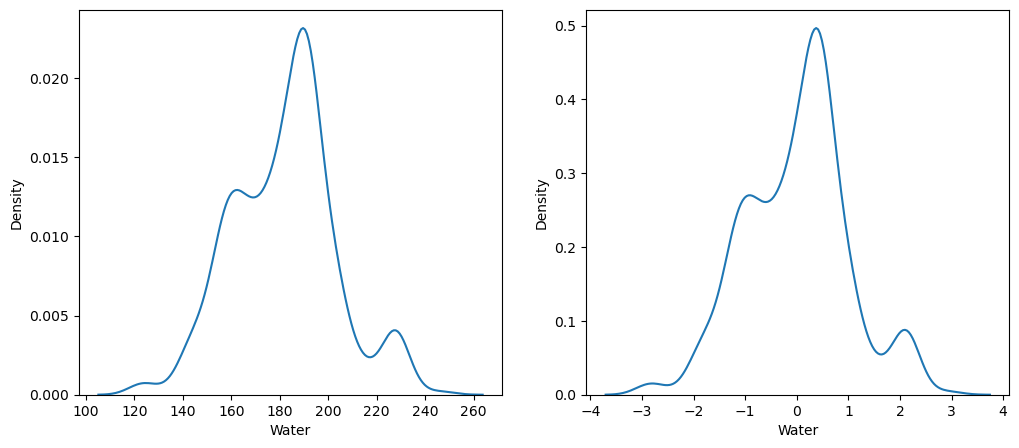

Superplasticizer


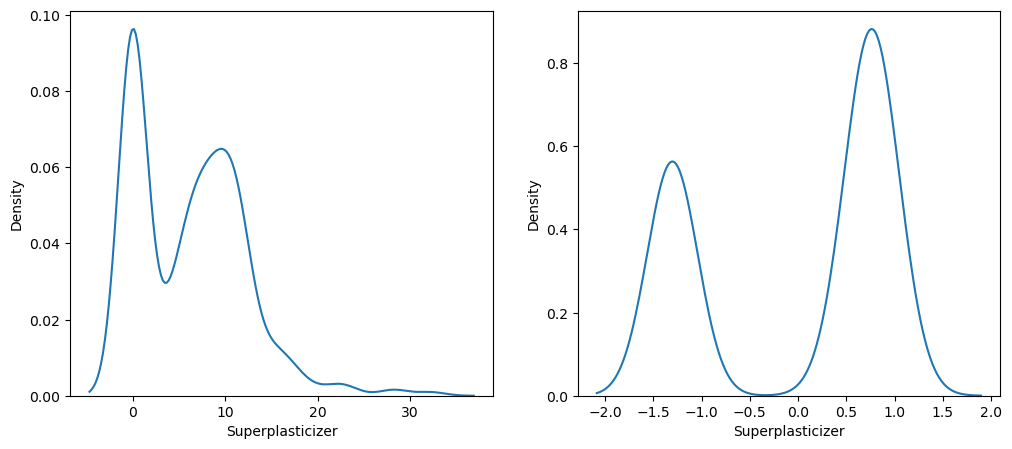

Coarse Aggregate


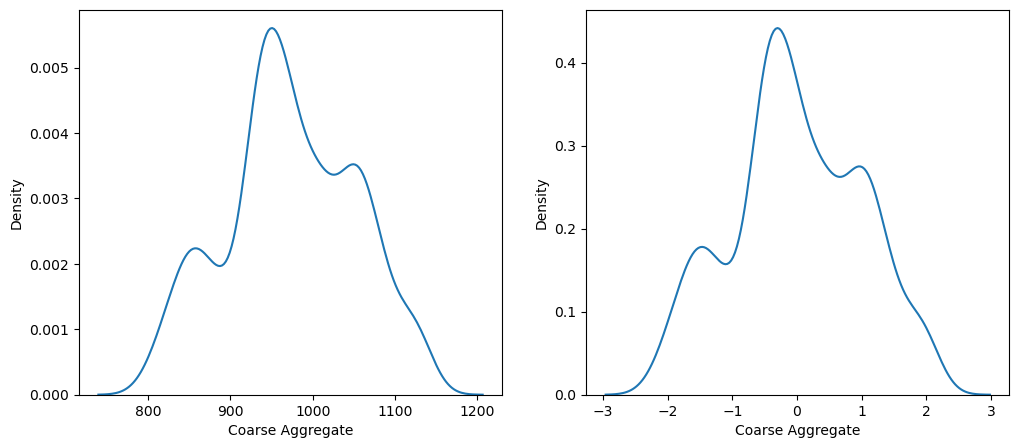

Fine Aggregate


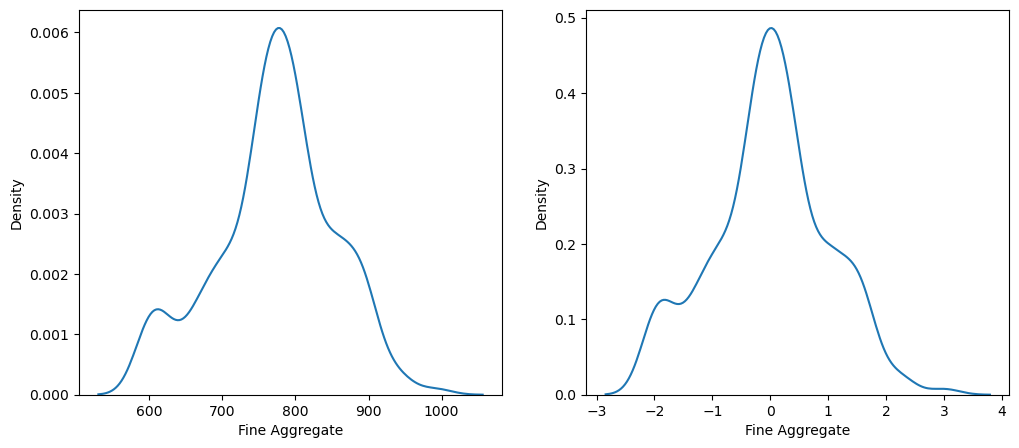

Age


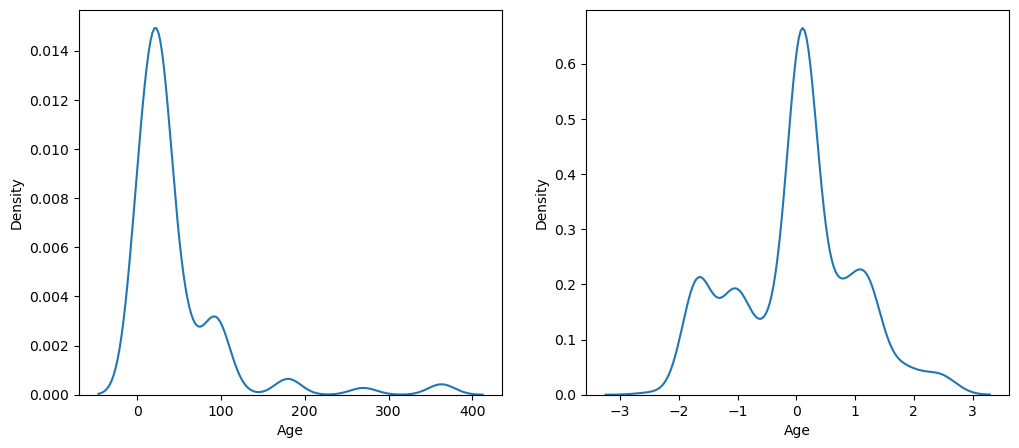

In [29]:
# Left side  : Before transformation
# Right Side : After transformation
for col in x_train_transformed.columns:
    print(col)
    fig, axes = plt.subplots(1,2, figsize =(12,5))
    
    sns.kdeplot(x_train[col],ax=axes[0])
    sns.kdeplot(x_train_transformed[col],ax=axes[1])
    
    plt.show()


In [33]:
# Now applying Yeo-Johnson

pt1 = PowerTransformer()

x_train_transformed2 = pt1.fit_transform(x_train)
x_test_transformed2 = pt1.transform(x_test)

lr1 = LinearRegression()
lr1.fit(x_train_transformed2,y_train)
y_pred3 = lr1.predict(x_test_transformed2)

print("R2 Score :",r2_score(y_test,y_pred3))

pd.DataFrame({'columns':x_train.columns,'yeo_johnson':pt1.lambdas_})

R2 Score : 0.8161906513354853


,columns,yeo_johnson
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [34]:
pt2 = PowerTransformer()

x_transformed2 = pt2.fit_transform(X)
np.mean(cross_val_score(lr1,x_transformed2,y,scoring='r2'))

0.6834625141500864

Cement


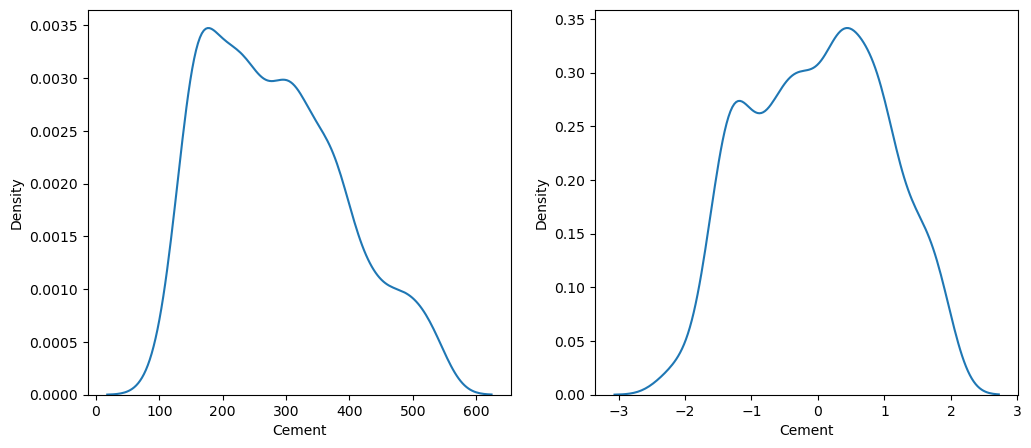

Blast Furnace Slag


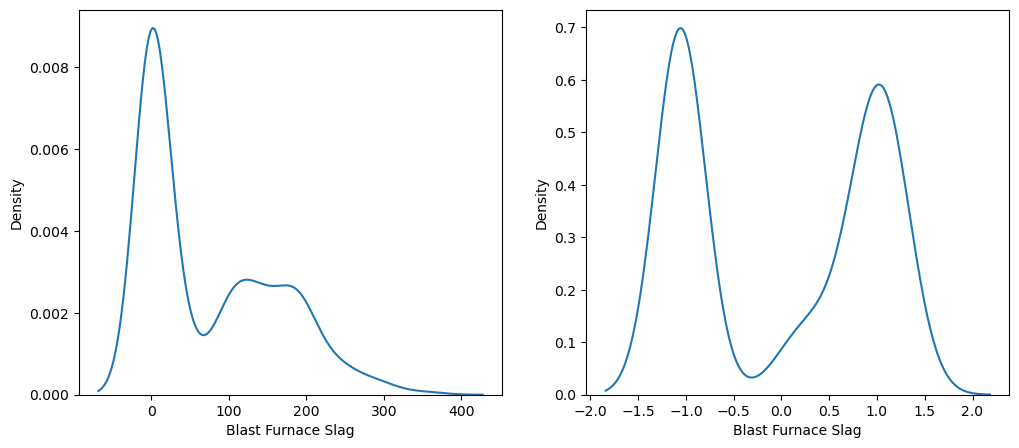

Fly Ash


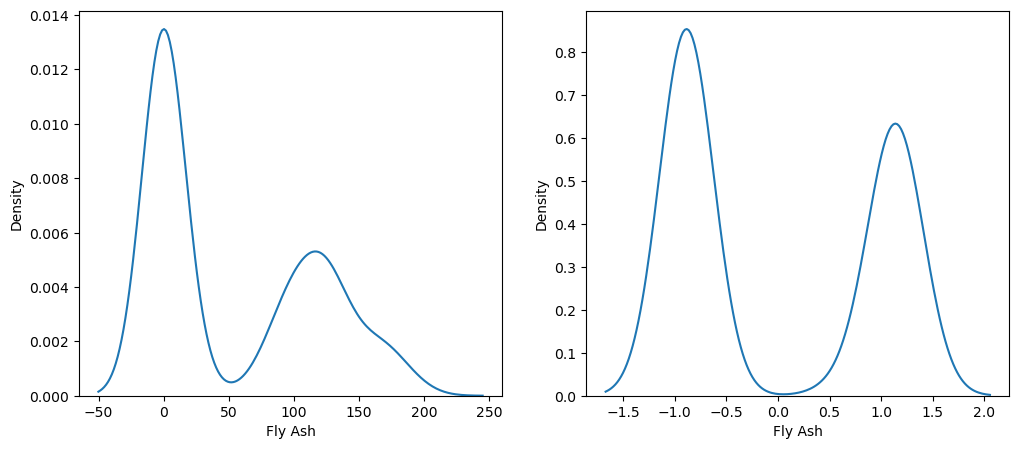

Water


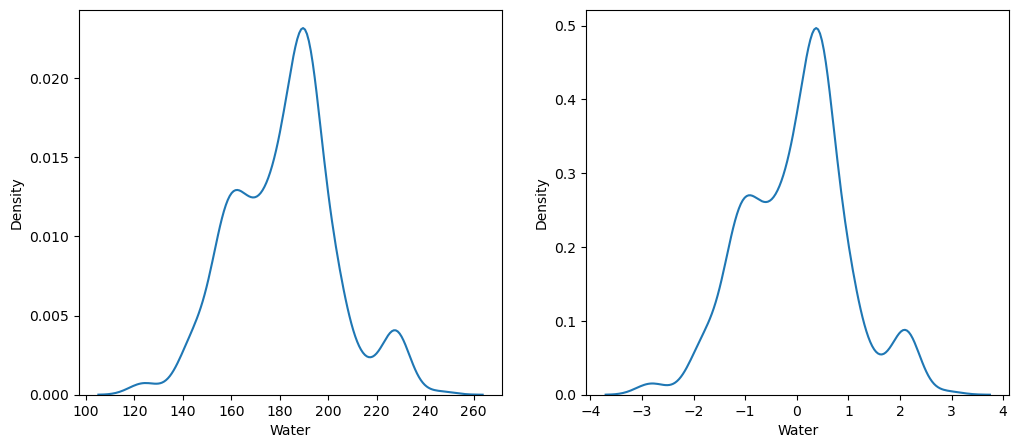

Superplasticizer


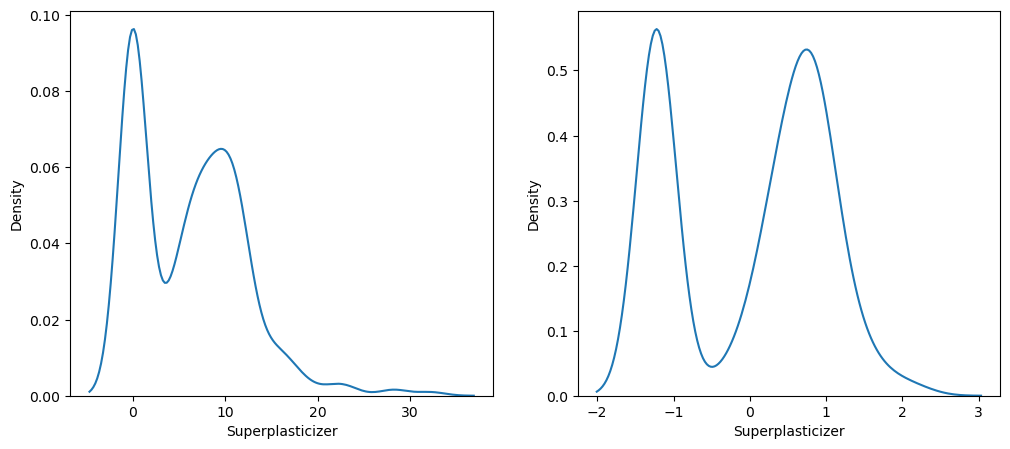

Coarse Aggregate


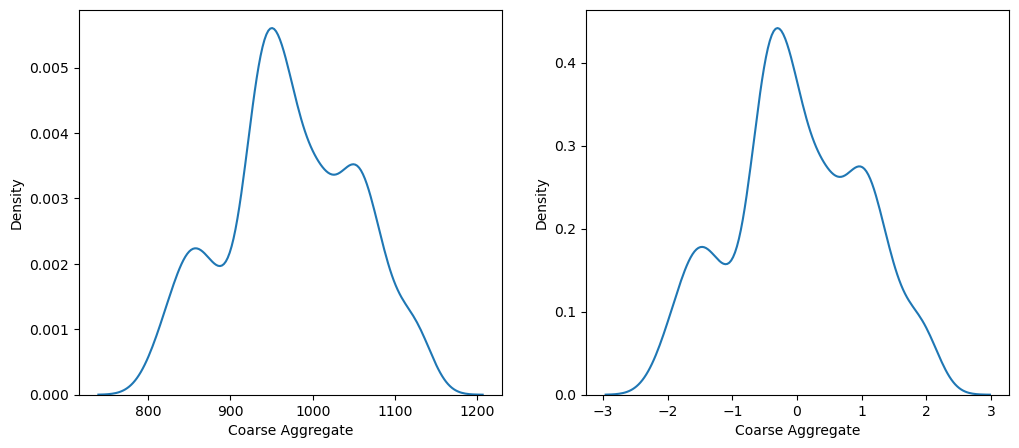

Fine Aggregate


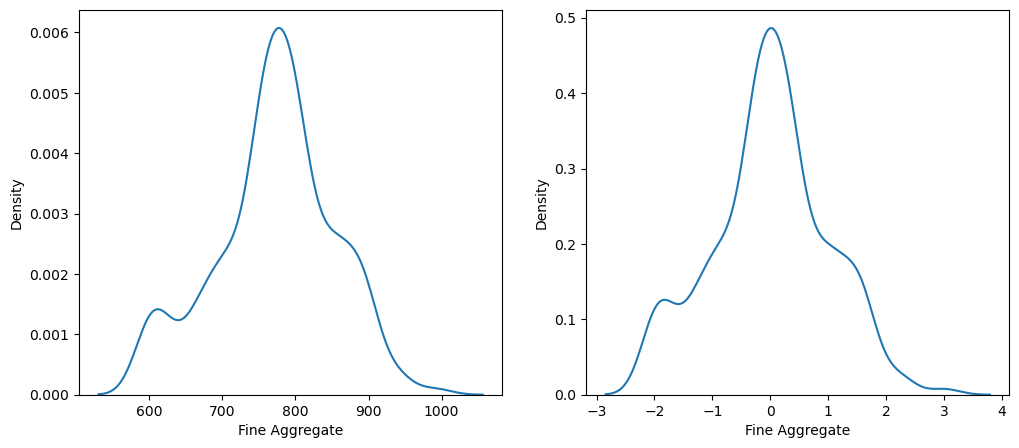

Age


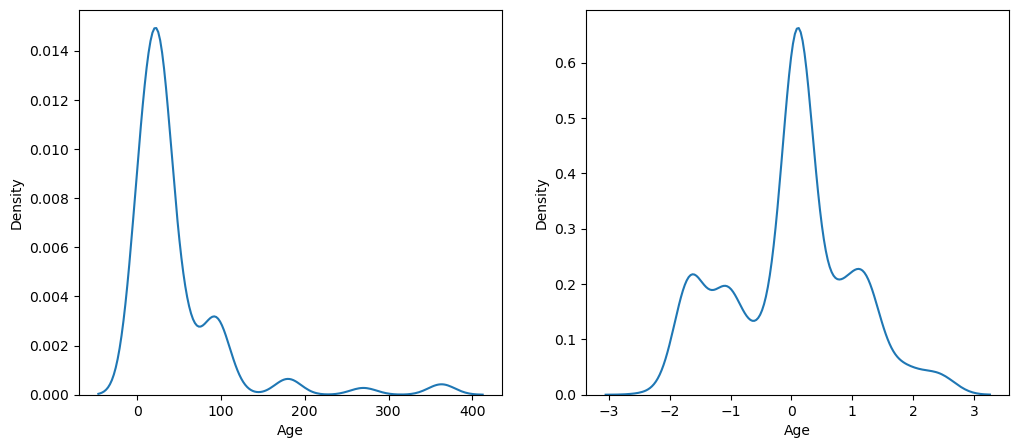

In [39]:
x_train_transformed2 = pd.DataFrame(x_train_transformed2,columns =x_train.columns)
# Left side  : Before transformation
# Right Side : After transformation
for col in x_train_transformed2.columns:
    print(col)
    fig, axes = plt.subplots(1,2, figsize =(12,5))
    
    sns.kdeplot(x_train[col],ax=axes[0])
    sns.kdeplot(x_train_transformed2[col],ax=axes[1])
    
    plt.show()

Without any 
    
    - r2 score : 0.6275531792314851
    - cross val score :

Box-Cox Transformation

    - r2 score : 
    - cross val score :

Yeo-Johnson Transformation

    - r2 score : 
    - cross val score :

In [40]:
pd.DataFrame({'cols':x_train.columns,'Box-Cox-Lambdas':pt.lambdas_,'Yeo-Johnson-Lambdas':pt1.lambdas_})

,cols,Box-Cox-Lambdas,Yeo-Johnson-Lambdas
0,Cement,0.172271,0.174348
1,Blast Furnace Slag,0.025273,0.015715
2,Fly Ash,-0.032412,-0.161447
3,Water,0.809568,0.771307
4,Superplasticizer,0.099711,0.253935
5,Coarse Aggregate,1.129168,1.130050
6,Fine Aggregate,1.829625,1.783100
7,Age,0.048975,0.019885
